### Importing the modules

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Importing the data ans separating data into train and test data

In [38]:
data = pd.read_csv('data2.1.txt')

trainData,testData = train_test_split(data,train_size=.8)
trainData.rename(columns = {'Status':'Admitted'}, inplace = True)
testData.rename(columns = {'Status':'Actual Status'}, inplace = True)

#Input
x = trainData[['Exam1 Score','Exam2 Score']]

#Output
y = trainData[['Admitted']]


In [39]:
trainData

,Exam1 Score,Exam2 Score,Admitted
47,97.771599,86.727822,1
11,75.013658,30.603263,0
20,67.372028,42.838438,0
0,34.623660,78.024693,0
57,32.577200,95.598548,0
...,...,...,...
43,82.368754,40.618255,0
32,52.107980,63.127624,0
7,75.024746,46.554014,1
33,52.045405,69.432860,1


In [40]:
testData

,Exam1 Score,Exam2 Score,Actual Status
35,54.635106,52.213886,0
97,99.315009,68.775409,1
8,76.098787,87.420570,1
53,34.524514,60.396342,0
90,94.094331,77.159105,1
56,97.645634,68.861573,1
27,93.114389,38.800670,0
42,94.443368,65.568922,1
92,55.482161,35.570703,0
39,34.183640,75.237720,0


### Function to plot the data

In [41]:
def plot(X,y):
    posIdx = np.where(y==1)[0]
    negIdx = np.where(y==0)[0]
    
    plt1 = plt.plot(x['Exam1 Score'].to_numpy()[posIdx], x['Exam2 Score'].to_numpy()[posIdx], 'r+',markersize=7,label='Admitted')
    plt2 = plt.plot(x['Exam1 Score'].to_numpy()[negIdx], x['Exam2 Score'].to_numpy()[negIdx], 'bo',markersize=7,label='Not admitted')

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

    # Specified in plot order
    plt.legend()
    plt.show()

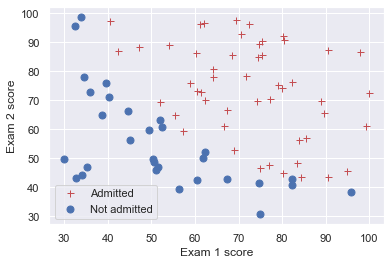

In [47]:
plot(x,y)


### Logit regression using statsmodel

In [62]:

xTrain = sm.add_constant(x)
logisticReg = sm.Logit(y,X)
resLog = logisticReg.fit()
print('Cost from stats model :',resLog.summary()) 


Optimization terminated successfully.
         Current function value: 0.210071
         Iterations 9
Cost from stats model :                            Logit Regression Results                           
Dep. Variable:               Admitted   No. Observations:                   80
Model:                          Logit   Df Residuals:                       77
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.6825
Time:                        10:18:56   Log-Likelihood:                -16.806
converged:                       True   LL-Null:                       -52.925
Covariance Type:            nonrobust   LLR p-value:                 2.059e-16
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -25.4096      6.476     -3.923      0.000     -38.103     -12.716
Ex

In [154]:
def confusionMatrix(data,actValues,model):
    predictedVals = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actValues,predictedVals,bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    confusion_matrix = pd.DataFrame(cm)
    confusion_matrix.columns=['Predicted 0','Predicted 1']
    confusion_matrix = confusion_matrix.rename(index={0:'Actual 0',1:'Actual 0'})
    return confusion_matrix,accuracy

In [155]:
x_ = testData[['Exam1 Score','Exam2 Score']]
xTest = sm.add_constant(x_)
actValues = testData['Actual Status']
predictedVals = resLog.predict(xTest)

In [156]:
cm ,accuracy = confusionMatrix(xTest,testData['Actual Status'],resLog)

In [157]:
cm

,Predicted 0,Predicted 1
Actual 0,9.0,1.0
Actual 0,0.0,10.0


In [158]:
print('Accuracy of the model is',accuracy,'%')

Accuracy of the model is 0.95 %
